<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/Challenge_1_WK_1_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Dataset and some useful libraries 

In [ ]:
!pip install keras-tuner

In [21]:
# load the mnist dataset from keras

import tensorflow as tf
from tensorflow import keras
from keras import datasets
import kerastuner as kt
tf.keras.datasets.fashion_mnist.load_data()
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# apply one-hot-encoding to the output data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

<ipython-input-21-a085f2bddb81>:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


##View the data

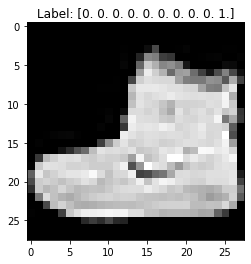

In [3]:
import matplotlib.pyplot as plt

# Select the first image in the training set
image = x_train[0]
label = y_train[0]

# Display the image and its label
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()


#Create, Compile and fit the model and plot the accuracy and loss

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6943 - accuracy: 0.7598 - val_loss: 0.5196 - val_accuracy: 0.8209
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4777 - accuracy: 0.8346 - val_loss: 0.4923 - val_accuracy: 0.8267
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4465 - accuracy: 0.8460 - val_loss: 0.4661 - val_accuracy: 0.8392
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4300 - accuracy: 0.8504 - val_loss: 0.4642 - val_accuracy: 0.8385
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4198 - accuracy: 0.8550 - val_loss: 0.4476 - val_accuracy: 0.8449
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4118 - accuracy: 0.8575 - val_loss: 0.4429 - val_accuracy: 0.8472
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4047 - accuracy: 0.8602 - val_loss: 0.4407 - val_accuracy

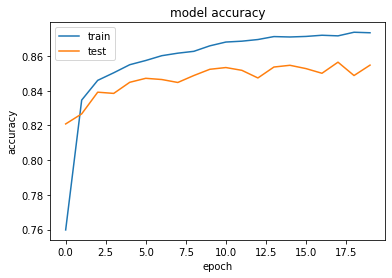

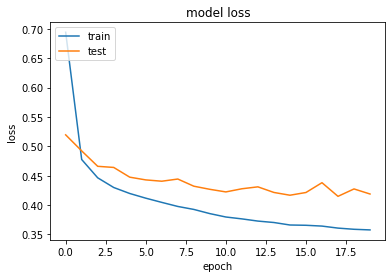

In [4]:
# Create, compile and fit the model with the original MNIST data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Augment the dataset with rotated zoomed, with and height shifts

In [5]:
# use the image data generator from keras to augment the data
from keras.preprocessing.image import ImageDataGenerator
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom


import numpy as np
# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1))
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0])

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1
     

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


#Create, compile and fit the model with the augmented fashion_mnist data

Epoch 1/20
5625/5625 [==============================] - 14s 2ms/step - loss: 0.7205 - accuracy: 0.7407 - val_loss: 0.5255 - val_accuracy: 0.8227
Epoch 2/20
5625/5625 [==============================] - 14s 2ms/step - loss: 0.6174 - accuracy: 0.7787 - val_loss: 0.5136 - val_accuracy: 0.8191
Epoch 3/20
5625/5625 [==============================] - 13s 2ms/step - loss: 0.6003 - accuracy: 0.7856 - val_loss: 0.4923 - val_accuracy: 0.8292
Epoch 4/20
5625/5625 [==============================] - 13s 2ms/step - loss: 0.5902 - accuracy: 0.7888 - val_loss: 0.4886 - val_accuracy: 0.8317
Epoch 5/20
5625/5625 [==============================] - 14s 2ms/step - loss: 0.5845 - accuracy: 0.7904 - val_loss: 0.4775 - val_accuracy: 0.8311
Epoch 6/20
5625/5625 [==============================] - 14s 3ms/step - loss: 0.5800 - accuracy: 0.7920 - val_loss: 0.4800 - val_accuracy: 0.8319
Epoch 7/20
5625/5625 [==============================] - 13s 2ms/step - loss: 0.5761 - accuracy: 0.7935 - val_loss: 0.4759 - val_ac

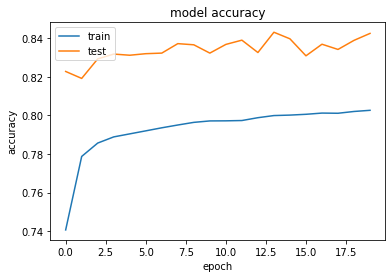

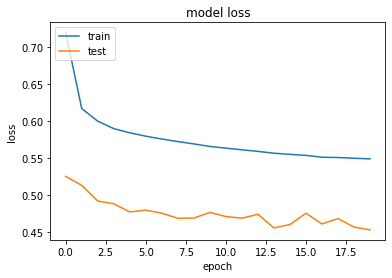

In [6]:
# same as code above to create, compile and fit the model but now using the new augmented data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Setup the Early Stopping callback

In [67]:
# create the model
model = Sequential() 
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                50        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# build the model
def model_builder(hp):
  model = tf.keras.Sequential()
  # specify the input layer separately to the first layer
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Specify a change in the number of units in this layer 
  # from 32 to 512 in steps of 32
  # We have specified the name of this hyperparameter as 'hidden_layer_1_units'
  # this name will appear in the output text when running tuner.search function later on
  hp_units = hp.Int('hidden_layer_1_units', min_value = 32, max_value = 512, step = 32)
  # specify the range of units (hp_units) as the units input parameter to this layer of the model
  model.add(Dense(units=hp_units, activation='relu'))

  hp_units = hp.Int('hidden_layer_2_units', min_value = 64, max_value = 128, step = 32)
  # specify the range of units (hp_units) as the units input parameter to this layer of the model
  model.add(Dense(units=hp_units, activation='relu'))

  # Specify the output layer
  model.add(Dense(units=10, activation='softmax'))

  # set the optimiser in the compile method
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [60]:
# instatiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,            # factor is a number that determines how many models are created to run in parallel whaen testing the hyperparameters
                     directory = 'my_dir', # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                     project_name = 'intro_to_kt') 
     

In [61]:
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [62]:
import IPython
# run the hyperparameter search
tuner.search(x_train, y_train, epochs = 10, validation_data = (x_test, y_test), callbacks = [ClearTrainingOutput()])

In [63]:
# print out the hyperparameters keras tuner has determined to be the best values
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'hidden_layer_1_units': 416, 'hidden_layer_2_units': 64, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0020'}


In [64]:
# set the model to have the optimum hyperparameters and print the summary so we can see the 
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 416)               326560    
                                                                 
 dense_22 (Dense)            (None, 64)                26688     
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 353,898
Trainable params: 353,898
Non-trainable params: 0
_________________________________________________________________


In [65]:

# train the model as usual
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4790 - accuracy: 0.8277 - val_loss: 0.4158 - val_accuracy: 0.8515
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3619 - accuracy: 0.8671 - val_loss: 0.3741 - val_accuracy: 0.8680
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3246 - accuracy: 0.8790 - val_loss: 0.3554 - val_accuracy: 0.8706
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3003 - accuracy: 0.8884 - val_loss: 0.3727 - val_accuracy: 0.8672
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2858 - accuracy: 0.8924 - val_loss: 0.3458 - val_accuracy: 0.8755
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2695 - accuracy: 0.8989 - val_loss: 0.3677 - val_accuracy: 0.8691
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2582 - accuracy: 0.9039 - val_loss: 0.3411 - val_

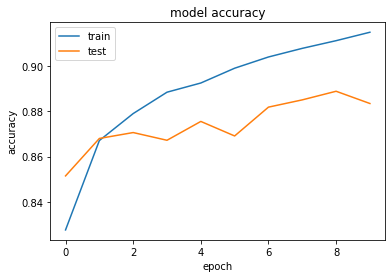

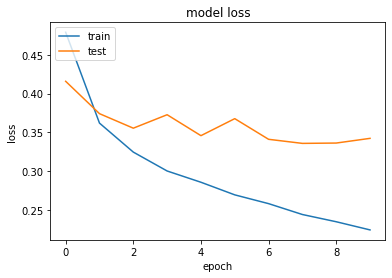

In [66]:
1# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()